# Using Python for Research Homework: Week 3, Case Study 3

In this case study, we will analyze a dataset consisting of an assortment of wines classified as "high quality" and "low quality" and will use k-Nearest Neighbors classification to determine whether or not other information about the wine helps us correctly guess whether a new wine will be of high quality.

1.0

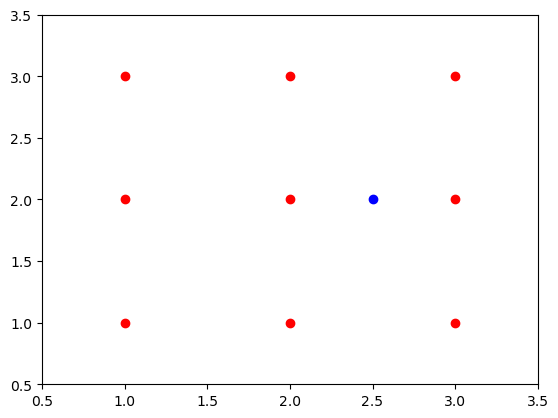

In [10]:
# First we will write code for our custom made kNN classifer and compare it with sklearn knn classifier
import numpy as np, random, scipy.stats as ss
# Custom made classifier first calculates the k nearest neighbour by sorting the k points that are most nearest to p 
def majority_vote_fast(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k=5):
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

# Generate pseudo data to see and plot using these function
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p=np.array([2.5,2])
import matplotlib.pyplot as plt
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])
outcomes=np.array([0,0,0,0,1,1,1,1,1])

# the function knn_predict predicts the class of p 
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

knn_predict(p,points,outcomes, k=5) # p belongs to class _

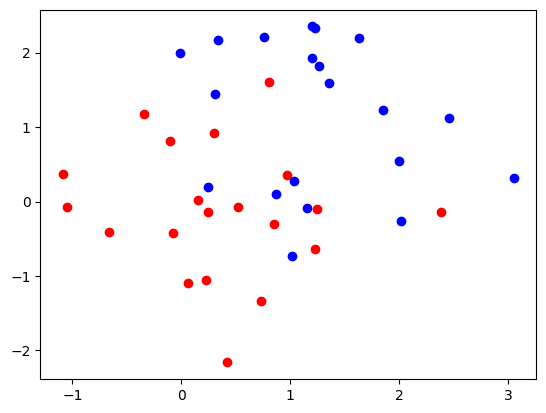

In [11]:
# generate sythetic data to test the power of knn
def generate_synth_data(n):
    """ Create two sets of data points from bivariate normal"""
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes= np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)
n=20
(points, outcomes)=generate_synth_data(n)
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")


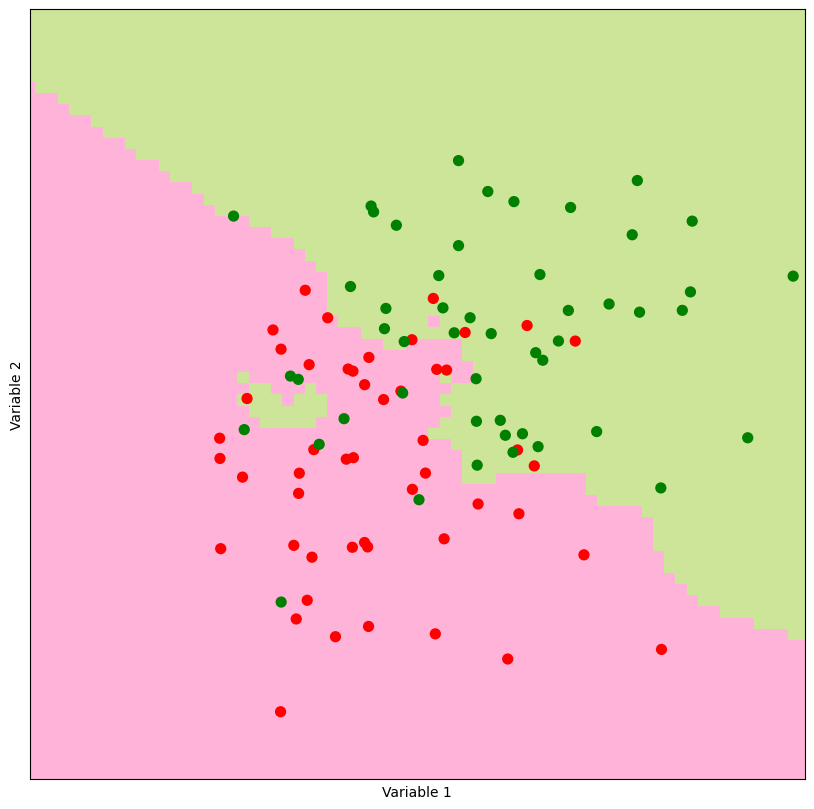

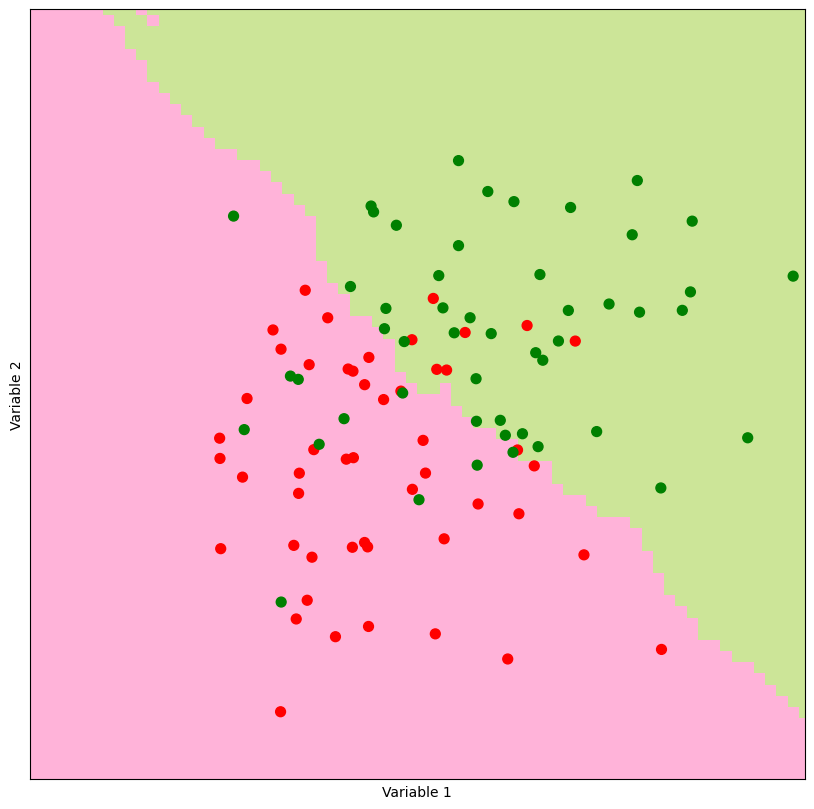

In [20]:
# Make a prediction grid using meshgrid
def make_prediction_grid(predictors,outcomes,limits,h,k): #limits provided as tuple
    """ Classify each point on the prediction grid"""
    (x_min,x_max,y_min,y_max)=limits # unpack the tuple provided as limits in function arguement
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h)
    xx,yy = np.meshgrid(xs,ys)


    prediction_grid=np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p,predictors,outcomes,k)
    return(xx ,yy, prediction_grid)        
# plot prediction grid

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

# lets run all this 
n=50
(predictors,outcomes)= generate_synth_data(n)

k=5; h=0.1; limits=(-3, 4,-3,4); filename='knn.pdf'
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

# value of k changes the smoothness of decision boundary with larger k more smoother. However there is bias-variance tradeoff  with more bias at higher k. k = 5 is alright
k=50; h=0.1; limits=(-3, 4,-3,4); filename='knn.pdf'
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

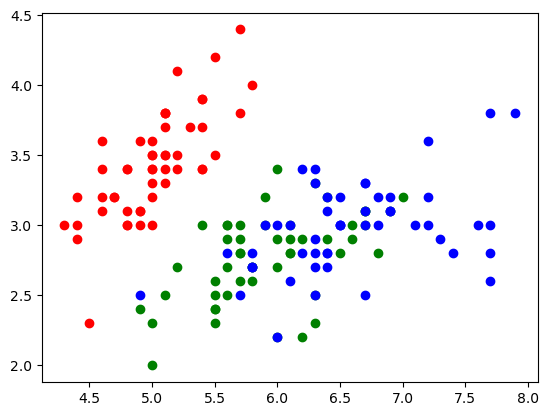

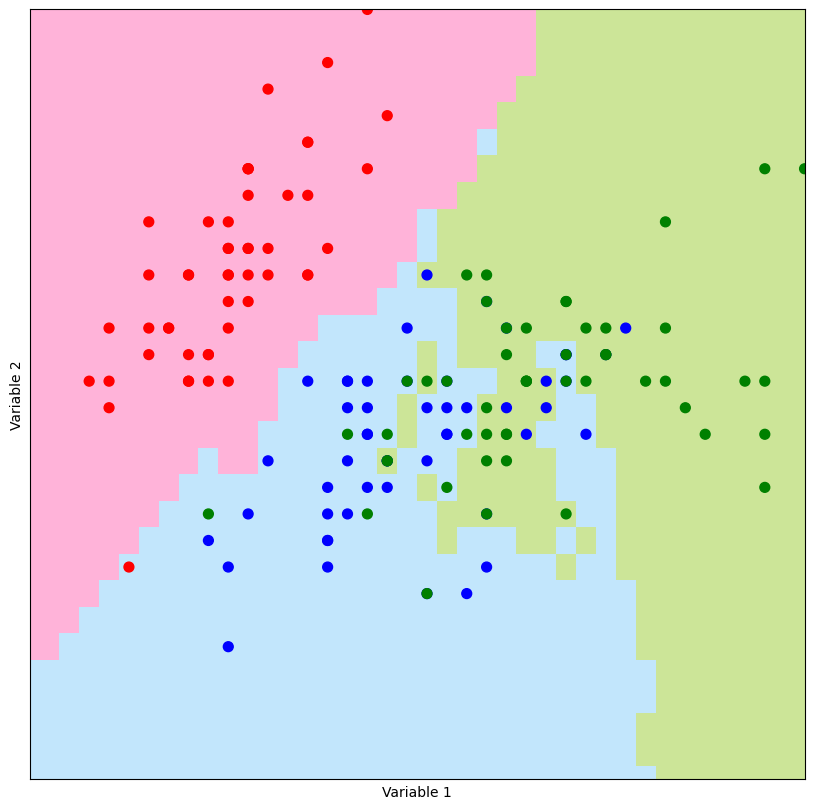

In [45]:
# our homemade knn classifier on iris dataset from skitlearn
from sklearn import datasets
iris=datasets.load_iris()

# see the data
iris["data"]

# Only use first two colums as predictors

predictors=iris.data[:,0:2]
outcomes=iris.target
 # plot for three outcomes of the data

plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")

k=5; h=0.1; limits=(4, 8,1.5,4.5); filename='iris.pdf'
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [47]:
# knn classifier from sklearn module

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_predictions = knn.predict(predictors)


In [59]:
# compare accuracy

# my_predictions=[]
#for p in predictors:
#    my_predictions.append(knn_predict(p, points, outcomes, k=5))

#my_predictions=np.array(my_predictions)
#my_predictions.shape
my_predictions =np.array([knn_predict(p, points, outcomes, k=5) for p in predictors])
print(100*np.mean(sk_predictions==my_predictions)) # returns accouracy in percentage
print(100*np.mean(sk_predictions==outcomes)) # compare with actual outcomes
print(100*np.mean(my_predictions==outcomes))

32.666666666666664
83.33333333333334
33.33333333333333


### Exercise 1

Our first step is to import the dataset.

#### Instructions 
- Read in the data as a pandas dataframe using `pd.read_csv`. The data can be found at https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@wine.csv

In [14]:
import pandas as pd

# write your code here!


### Exercise 2

Next, we will inspect the dataset and perform some mild data cleaning.

#### Instructions 
- In order to get all numeric data, we will change the `color` column to an `is_red` column. 
    - If `color == 'red'`, we will encode a `1` for `is_red`
    - If `color == 'white'`, we will encode a `0` for `is_red`
- Create this new column, `is_red`.
- Drop the `color`, `quality`, and `high_quality` columns as we will be predict the quality of wine using numeric data in a later exercise
- Store this all numeric data in a pandas dataframe called `numeric_data`

In [ ]:
# write your code here!


### Exercise 3

We want to ensure that each variable contributes equally to the kNN classifier, so we will need to scale the data by subtracting the mean of each variable (column) and dividing each variable (column) by its standard deviation. Then, we will use principal components to take a linear snapshot of the data from several different angles, with each snapshot ordered by how well it aligns with variation in the data. In this exercise, we will scale the numeric data and extract the first two principal components.

#### Instructions 
- Scale the data using the `sklearn.preprocessing` function `scale()` on `numeric_data`.
- Convert this to a `pandas` dataframe, and store as `numeric_data`.
    - Include the numeric variable names using the parameter `columns = numeric_data.columns`.
- Use the `sklearn.decomposition` module `PCA()` and store it as `pca`.
- Use the `fit_transform()` function to extract the first two principal components from the data, and store them as `principal_components`.
- *Note*: You may get a `DataConversionWarning`, but you can safely ignore it

In [ ]:
import sklearn.preprocessing
scaled_data = 
numeric_data = 

import sklearn.decomposition
pca = 
principal_components = 

### Exercise 4

In this exercise, we will plot the first two principal components of the covariates in the dataset. The high and low quality wines will be colored using red and blue, respectively.

#### Instructions 
- The first two principal components can be accessed using `principal_components[:,0]` and `principal_components[:,1]`. Store these as `x` and `y` respectively, and make a scatter plot of these first two principal components.
- How well are the two groups of wines separated by the first two principal components?

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
observation_colormap = ListedColormap(['red', 'blue'])
x = # Enter your code here!
y = # Enter your code here!

plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Exercise 5

In this exercise, we will create a function that calculates the accuracy between predictions and outcomes.

#### Instructions
- Create a function `accuracy(predictions, outcomes)` that takes two lists of the same size as arguments and returns a single number, which is the percentage of elements that are equal for the two lists.
- Use accuracy to compare the percentage of similar elements in the `x` and `y` `numpy` arrays defined below.
- Print your answer.

In [ ]:
import numpy as np 
np.random.seed(1) # do not change

x = np.random.randint(0, 2, 1000)
y = np.random.randint(0 ,2, 1000)

def accuracy(predictions, outcomes):
    # write your code here!
    

### Exercise 6

The dataset remains stored as data. Because most wines in the dataset are classified as low quality, one very simple classification rule is to predict that all wines are of low quality. In this exercise, we determine the accuracy of this simple rule. 

#### Instructions
- Use `accuracy()` to calculate how many wines in the dataset are of low quality. Do this by using 0 as the first argument, and `data["high_quality"]` as the second argument.
- Print your result.

In [ ]:
# write your code here!


### Exercise 7 

In this exercise, we will use the kNN classifier from `scikit-learn` to predict the quality of wines in our dataset.

#### Instructions
- Use `knn.predict(numeric_data)` to predict which wines are high and low quality and store the result as `library_predictions`.
- Use `accuracy` to find the accuracy of your predictions, using `library_predictions` as the first argument and `data["high_quality"]` as the second argument.
- Print your answer. Is this prediction better than the simple classifier in Exercise 6?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])
# Enter your code here!


### Exercise 8

Unlike the `scikit-learn` function, our homemade kNN classifier does not take any shortcuts in calculating which neighbors are closest to each observation, so it is likely too slow to carry out on the whole dataset. In this exercise, we will select a subset of our data to use in our homemade kNN classifier.

#### Instructions 
- Fix the random generator using `random.seed(123)`, and select 10 rows from the dataset using `random.sample(range(n_rows), 10)`. Store this selection as `selection`.

In [ ]:
n_rows = data.shape[0]
# Enter your code here.


### Exercise 9

We are now ready to use our homemade kNN classifier and compare the accuracy of our results to the baseline.

#### Instructions 
- For each predictor` p` in `predictors[selection]`, use `knn_predict(p, predictors[training_indices,:], outcomes[training_indices], k=5)` to predict the quality of each wine in the prediction set, and store these predictions as a np.array called `my_predictions`. Note that knn_predict is already defined as in the Case 3 videos.
- Using the `accuracy` function, compare these results to the selected rows from the `high_quality` variable in data using `my_predictions` as the first argument and `data.high_quality.iloc[selection]` as the second argument. Store these results as `percentage`.
- Print your answer.

In [ ]:
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(data["high_quality"])

my_predictions = # Enter your code here!
percentage = # Enter your code here!